In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import OrdinalEncoder
from tqdm import tqdm
import random
from sklearn.metrics import r2_score

In [2]:
imdb = pd.read_csv("imdb_top_1000.csv")

In [3]:
imdb.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [6]:
print(imdb.columns)

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')


In [7]:
imdb.Genre.nunique()

202

In [8]:
#dropping extra columns
imdb = imdb.drop(['Poster_Link','Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'], axis = 1)

In [9]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Overview       1000 non-null   object 
 7   Meta_score     843 non-null    float64
 8   Director       1000 non-null   object 
dtypes: float64(2), object(7)
memory usage: 70.4+ KB


In [12]:
print("Number of null values in each column:")
print(imdb.isnull().sum())

Number of null values in each column:
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
dtype: int64


#### handling null values - meta score and certificate

In [13]:
imdb.Meta_score = imdb.Meta_score.fillna(imdb.Meta_score.mean())

In [14]:
imdb.Meta_score[20] #done

77.97153024911032

In [15]:
imdb.Certificate = imdb.Certificate.fillna(imdb.Certificate.value_counts().index[0])
#df.fillna(df['Label'].value_counts().index[0]

In [16]:
imdb.info() #done

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    1000 non-null   object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Overview       1000 non-null   object 
 7   Meta_score     1000 non-null   float64
 8   Director       1000 non-null   object 
dtypes: float64(2), object(7)
memory usage: 70.4+ KB


#### making director a 0/1 column
1 if the director is in the top 10 frequent directors else 0

In [17]:
top10dir = list(pd.value_counts(imdb.Director)[:10].index)

In [18]:
dir1 = []
for i in imdb.Director:
    if i in top10dir:
        dir1.append(1)
    else:
        dir1.append(0)

In [19]:
imdb.Director = dir1

#### encoding categorical variables: certificate and genre

In [20]:
cert = np.asarray(imdb.Certificate).reshape(-1,1)
encoder = OrdinalEncoder()
cert = encoder.fit_transform(cert)
cert[:5]

array([[ 1.],
       [ 1.],
       [14.],
       [ 1.],
       [12.]])

In [21]:
cert1 = []
for i in cert:
    cert1.append((int(i[0])))

In [22]:
imdb.Certificate = cert1

In [23]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    1000 non-null   int64  
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Overview       1000 non-null   object 
 7   Meta_score     1000 non-null   float64
 8   Director       1000 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 70.4+ KB


### ENCODING GENRE IN ONE COLUMN

gggg = np.asarray(imdb.Genre).reshape(-1,1)
encoder = OrdinalEncoder()
gggg = encoder.fit_transform(gggg)
gggg[:5]

gggg1 = []
for i in gggg:
    gggg1.append((int(i[0])))
gggg1[:5]

imdb["GenreEncoded"]= gggg1

imdb.info()

for genre, i want to do maybe one hot encoding? because there are multiple possible values for genre. either split it into multiple columns. yes. one hot encoding is better. 

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
onehot = OneHotEncoder()

In [26]:
temp_g = onehot.fit_transform(np.asarray(imdb.Genre).reshape(-1,1))

In [27]:
genres = []
for i in imdb.Genre:
    i = i.split(",")
    for j in i:
        genres.append(j.strip())
pd.value_counts(pd.Series(genres))

Drama        724
Comedy       233
Crime        209
Adventure    196
Action       189
Thriller     137
Romance      125
Biography    109
Mystery       99
Animation     82
Sci-Fi        67
Fantasy       66
History       56
Family        56
War           51
Music         35
Horror        32
Western       20
Film-Noir     19
Sport         19
Musical       17
dtype: int64

In [28]:
genres_dict = {}
k = 0
for i in set(genres):
    genres_dict[i] = k 
    k +=1


In [29]:
genres_dict #encoded genres

{'Horror': 0,
 'History': 1,
 'Drama': 2,
 'Sci-Fi': 3,
 'Action': 4,
 'Adventure': 5,
 'Fantasy': 6,
 'Romance': 7,
 'Thriller': 8,
 'Comedy': 9,
 'Crime': 10,
 'Musical': 11,
 'Biography': 12,
 'Mystery': 13,
 'Family': 14,
 'Film-Noir': 15,
 'Music': 16,
 'Sport': 17,
 'Western': 18,
 'Animation': 19,
 'War': 20}

In [ ]:
#genres_dict[""] = 21

In [ ]:
#genres_dict

In [30]:
gen_arr = []
for i in range(1000):
    gen_arr.append([])
    for j in range(21):
        gen_arr[i].append(0) #1000 rows, 21 cols for each genre
gen_arr = np.asarray(gen_arr)

In [31]:
gen_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [32]:
gen1 = []
for i in imdb.Genre:
    genres1 = i.split(",")
    genres1 = [j.strip() for j in genres1]
    gen1.append(genres1)

In [33]:
gg = list(genres_dict.keys())
gg.index('Comedy')

for i in range(len(gen1)):
    for j in gen1[i]:
        #print(j)
        gen_arr[i][gg.index(j)] = 1


In [34]:
genarrt = gen_arr.transpose()

In [35]:
for i in range(len(gg)):
    imdb[gg[i]] = list(genarrt[i])

In [36]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    1000 non-null   int64  
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Overview       1000 non-null   object 
 7   Meta_score     1000 non-null   float64
 8   Director       1000 non-null   int64  
 9   Horror         1000 non-null   int32  
 10  History        1000 non-null   int32  
 11  Drama          1000 non-null   int32  
 12  Sci-Fi         1000 non-null   int32  
 13  Action         1000 non-null   int32  
 14  Adventure      1000 non-null   int32  
 15  Fantasy        1000 non-null   int32  
 16  Romance        1000 non-null   int32  
 17  Thriller       1000 non-null   int32  
 18  Comedy   

In [ ]:
##

#### convert Released_Year, Runtime to int because it is of type string right now

In [37]:
year = []
time = []
for i in range(1000):
    if imdb.Released_Year[i] != 'PG':
        year.append(int(imdb.Released_Year[i]))
    else:
        year.append(1995) #apollo 13 was released in 1995
    
    time.append(int(imdb.Runtime[i].split(" ")[0]))

In [58]:
imdb.Released_Year = year
imdb.Runtime = time

In [59]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Series_Title    1000 non-null   object 
 1   Released_Year   1000 non-null   int64  
 2   Certificate     1000 non-null   int64  
 3   Runtime         1000 non-null   int64  
 4   Genre           1000 non-null   object 
 5   IMDB_Rating     1000 non-null   float64
 6   Overview        1000 non-null   object 
 7   Meta_score      1000 non-null   float64
 8   Director        1000 non-null   int64  
 9   Horror          1000 non-null   int32  
 10  History         1000 non-null   int32  
 11  Drama           1000 non-null   int32  
 12  Sci-Fi          1000 non-null   int32  
 13  Action          1000 non-null   int32  
 14  Adventure       1000 non-null   int32  
 15  Fantasy         1000 non-null   int32  
 16  Romance         1000 non-null   int32  
 17  Thriller        1000 non-null   in

In [60]:
imdb.Genre.nunique()

202

## NLP tasks on overvieiw and title

In [38]:
from nltk.corpus import stopwords

verbs: https://github.com/datmt/English-Verbs/blob/master/verbsList <br/>
positive words: https://gist.github.com/mkulakowski2/4289437 <br/>
negative words: https://gist.github.com/mkulakowski2/4289441

In [39]:
pos = open("positive words.txt", "r")
pos = list(pos.read().split("\n"))
neg = open("negative words.txt", "r")
neg = list(neg.read().split("\n"))
verbs = open("verbs.txt", "r")
verbs = list(verbs.read().split("\n"))
stops = set(stopwords.words('english'))

In [ ]:
#pos

#### NLP cleaning

- removing punctuation
- lower case


In [40]:
text_all = []
for i in range(1000):
    thing = imdb.Series_Title[i]+". "+imdb.Overview[i]
    text_all.append(thing)

In [41]:
def remove_punc(str1):
    str2 = ""
    for i in str1:
        if i.isalpha() == True or i == " ":
            str2 = str2+i
    str2 = str.lower(str2)
    return str2

In [42]:
text_all1 = []
for i in text_all:
    text_all1.append(remove_punc(i))
#text_all1

In [43]:
def count_stuff(str1):
    p=0
    n=0
    v=0
    s=0
    #pos words, neg words, stopwords, verbsif j in pos:
    for i in str1.split():
        if i in pos:
            p+=1
        if i in neg:
            n+=1
        if i in verbs:
            v +=1
        if i in stops:
            s+=1
    return [p,n,v,s]

In [44]:
count_stuff(text_all1[101])

[2, 1, 6, 9]

In [45]:
text_all1[10]

'the lord of the rings the fellowship of the ring a meek hobbit from the shire and eight companions set out on a journey to destroy the powerful one ring and save middleearth from the dark lord sauron'

In [46]:
pw = []
nw = []
vv = []
sw = []
for i in tqdm(text_all1):
    pw.append(count_stuff(i)[0])
    nw.append(count_stuff(i)[1])
    vv.append(count_stuff(i)[2])
    sw.append(count_stuff(i)[3])    

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 69.52it/s]


In [47]:
imdb['positive_words'] = pw
imdb['negative_words'] = nw
imdb['verbs'] = vv
imdb['stopwords'] = sw

In [61]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Series_Title    1000 non-null   object 
 1   Released_Year   1000 non-null   int64  
 2   Certificate     1000 non-null   int64  
 3   Runtime         1000 non-null   int64  
 4   Genre           1000 non-null   object 
 5   IMDB_Rating     1000 non-null   float64
 6   Overview        1000 non-null   object 
 7   Meta_score      1000 non-null   float64
 8   Director        1000 non-null   int64  
 9   Horror          1000 non-null   int32  
 10  History         1000 non-null   int32  
 11  Drama           1000 non-null   int32  
 12  Sci-Fi          1000 non-null   int32  
 13  Action          1000 non-null   int32  
 14  Adventure       1000 non-null   int32  
 15  Fantasy         1000 non-null   int32  
 16  Romance         1000 non-null   int32  
 17  Thriller        1000 non-null   in

In [62]:
imdb[['Released_Year', 'Certificate', 'Runtime', \
       'Meta_score', 'Director',\
       'positive_words', 'negative_words', 'verbs', 'stopwords', 'IMDB_Rating']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Released_Year   1000 non-null   int64  
 1   Certificate     1000 non-null   int64  
 2   Runtime         1000 non-null   int64  
 3   Meta_score      1000 non-null   float64
 4   Director        1000 non-null   int64  
 5   positive_words  1000 non-null   int64  
 6   negative_words  1000 non-null   int64  
 7   verbs           1000 non-null   int64  
 8   stopwords       1000 non-null   int64  
 9   IMDB_Rating     1000 non-null   float64
dtypes: float64(2), int64(8)
memory usage: 78.2 KB


In [ ]:
#pd.value_counts(imdb.stopwords)

#### Train test split and correlation

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
imdb.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Horror',
       'History', 'Drama', 'Sci-Fi', 'Action', 'Adventure', 'Fantasy',
       'Romance', 'Thriller', 'Comedy', 'Crime', 'Musical', 'Biography',
       'Mystery', 'Family', 'Film-Noir', 'Music', 'Sport', 'Western',
       'Animation', 'War', 'positive_words', 'negative_words', 'verbs',
       'stopwords'],
      dtype='object')

In [65]:
X_train, X_test, y_train, y_test = train_test_split(imdb[\
    ['Released_Year', 'Certificate', 'Runtime',\
        'Meta_score', 'Director', 'Mystery',\
       'Film-Noir', 'Action', 'Family', 'Romance', 'Comedy', 'Music',\
       'History', 'Sport', 'Animation', 'Drama', 'Thriller', 'Biography',\
       'War', 'Crime', 'Adventure', 'Horror', 'Musical', 'Sci-Fi', 'Western',\
       'Fantasy', 'positive_words', 'negative_words', 'verbs', 'stopwords']],\
                                                    imdb['IMDB_Rating'], test_size=0.3, random_state=42)
                                                    

Text(0.5, 1.0, 'Correlation between features')

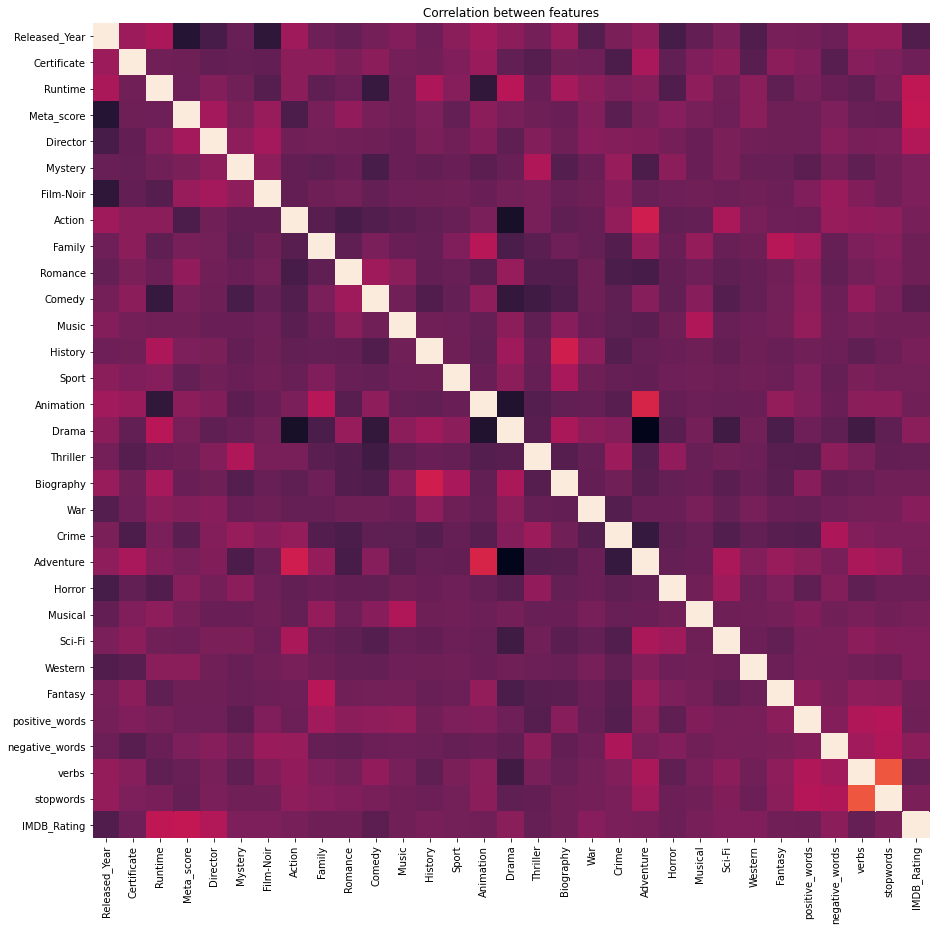

In [66]:
plt.figure(figsize = (15,15))

sns.heatmap(\
            imdb[['Released_Year', 'Certificate', 'Runtime',\
        'Meta_score', 'Director', 'Mystery',\
       'Film-Noir', 'Action', 'Family', 'Romance', 'Comedy', 'Music',\
       'History', 'Sport', 'Animation', 'Drama', 'Thriller', 'Biography',\
       'War', 'Crime', 'Adventure', 'Horror', 'Musical', 'Sci-Fi', 'Western',\
       'Fantasy', 'positive_words', 'negative_words', 'verbs', 'stopwords','IMDB_Rating']].corr(), cbar = False)
plt.title("Correlation between features")

#### Linear regression

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lm = LinearRegression().fit(X_train, y_train)

In [69]:
pred = lm.predict(X_test)

In [70]:
from sklearn.metrics import mean_squared_error

In [71]:
rms = mean_squared_error(y_test, pred, squared=False)

In [72]:
rms

0.2583050179022791

In [73]:
r2_score(y_test, pred)

0.16211205851819832

In [74]:
lm.coef_

array([-0.00153905, -0.00183953,  0.00224378,  0.00457431,  0.11975966,
        0.01236284, -0.10613108, -0.01804823, -0.05776349, -0.06343195,
        0.00059714, -0.00132595, -0.10310905,  0.00720509,  0.07942639,
        0.02026106, -0.04758131, -0.02319097,  0.0235708 ,  0.00476588,
       -0.04880716, -0.09516059, -0.06309021,  0.08511973,  0.01758431,
        0.01169025, -0.00486136,  0.00554925, -0.01004713,  0.00477024])

In [75]:
import statsmodels.api as sm

In [76]:
model0 = sm.OLS(y_train, X_train).fit()

In [77]:
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            IMDB_Rating   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.957e+04
Date:                Tue, 07 Dec 2021   Prob (F-statistic):                        0.00
Time:                        21:10:12   Log-Likelihood:                         -72.791
No. Observations:                 700   AIC:                                      205.6
Df Residuals:                     670   BIC:                                      342.1
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Released_Year      0.0036   5.64e-05     64.157      0.000       0.004       0.004
Certificate       -0.0029      0.002     -1.256      0.209      -0.008       0.002
Runtime            0.0015      0.000      3.390      0.001       0.001       0.002
Meta_score         0.0077      0.001      8.144      0.000       0.006       0.010
Director           0.1463      0.037      3.962      0.000       0.074       0.219
Mystery            0.0183      0.039      0.466      0.642      -0.059       0.095
Film-Noir          0.0418      0.079      0.528      0.598      -0.114       0.197
Action            -0.0378      0.032     -1.179      0.239      -0.101       0.025
Family            -0.0171      0.049     -0.348      0.728      -0.114       0.079
Romance           -0.0438      0.035     -1.240      0.215      -0.113       0.026
Comedy            -0.0027      0.031     -0.088      0.930      -0.063       0.058
Music             -0.0375      0.064     -0.586      0.558      -0.163       0.088
History           -0.0692      0.050     -1.393      0.164      -0.167       0.028
Sport             -0.0030      0.073     -0.041      0.967      -0.146       0.140
Animation         -0.0110      0.046     -0.242      0.809      -0.101       0.079
Drama             -0.0031      0.033     -0.093      0.926      -0.068       0.062
Thriller          -0.0634      0.037     -1.731      0.084      -0.135       0.009
Biography         -0.0432      0.038     -1.122      0.262      -0.119       0.032
War                0.0781      0.049      1.595      0.111      -0.018       0.174
Crime              0.0292      0.030      0.963      0.336      -0.030       0.089
Adventure         -0.0359      0.035     -1.040      0.299      -0.104       0.032
Horror            -0.0134      0.065     -0.207      0.836      -0.141       0.114
Musical           -0.0033      0.092     -0.035      0.972      -0.185       0.178
Sci-Fi             0.0816      0.048      1.718      0.086      -0.012       0.175
Western            0.1227      0.076      1.618      0.106      -0.026       0.272
Fantasy           -0.0062      0.046     -0.136      0.892      -0.096       0.083
positive_words     0.0064      0.011      0.563      0.574      -0.016       0.029
negative_words     0.0054      0.009      0.616      0.538      -0.012       0.023
verbs             -0.0129      0.006     -2.298      0.022      -0.024      -0.002
stopwords          0.0038      0.003      1.247      0.213      -0.002       0.010
==============================================================================
Omnibus:                       58.185   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.254
Skew:   

### random forest

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
rf = RandomForestRegressor(n_estimators=10, random_state =101)

In [80]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=101)

In [81]:
pred_rf = rf.predict(X_test)

In [82]:
rms_rf = mean_squared_error(y_test, pred_rf, squared=False)

In [83]:
rms_rf

0.26571601381926535

In [84]:
rms_rf_est = []
for i in tqdm(range(1,100)):
    rf = RandomForestRegressor(n_estimators=i, random_state = 101)
    rf.fit(X_train, y_train)
    pred_rf = rf.predict(X_test)
    rms_rf_est.append(mean_squared_error(y_test, pred_rf, squared=False))

100%|██████████████████████████████████████████████████████████████████████████████████| 99/99 [00:16<00:00,  6.11it/s]


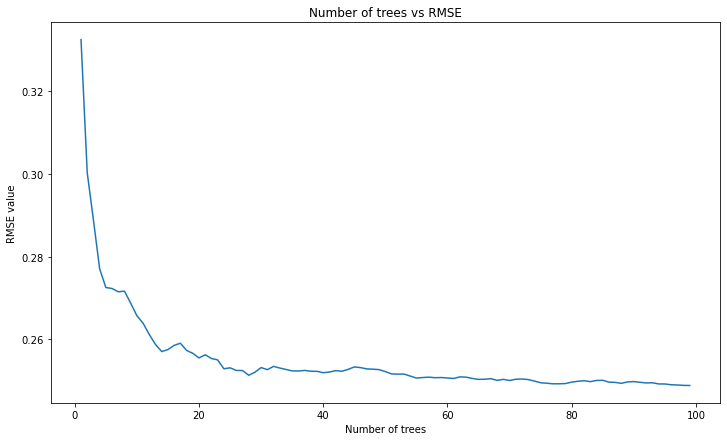

In [85]:
plt.figure(figsize = (12,7))
plt.plot(list(range(1,100)), rms_rf_est)
plt.title("Number of trees vs RMSE")
plt.xlabel("Number of trees")
plt.ylabel("RMSE value")
plt.show()

In [86]:
rms_rf_est.index(min(rms_rf_est))

98

In [87]:
min(rms_rf_est)

0.2488359663769942

##### final model - RF

In [88]:
rf_final = RandomForestRegressor(n_estimators=rms_rf_est.index(min(rms_rf_est)), random_state=101)
rf_final.fit(X_train, y_train)
pred_rf_final = rf_final.predict(X_test)

In [89]:
r2_score( y_test, pred_rf_final) #y_test, pred

0.22222809018701217

In [90]:
rf_final.feature_importances_

array([0.14054149, 0.06032717, 0.16874117, 0.17538784, 0.02897804,
       0.01039981, 0.00186508, 0.01039607, 0.00634961, 0.0138327 ,
       0.01122314, 0.00509198, 0.00446697, 0.00501345, 0.00730158,
       0.01063108, 0.007721  , 0.00673362, 0.01206173, 0.01620506,
       0.00848153, 0.00348219, 0.0005274 , 0.01334905, 0.00493197,
       0.00755798, 0.0449743 , 0.06173089, 0.06036044, 0.09133568])

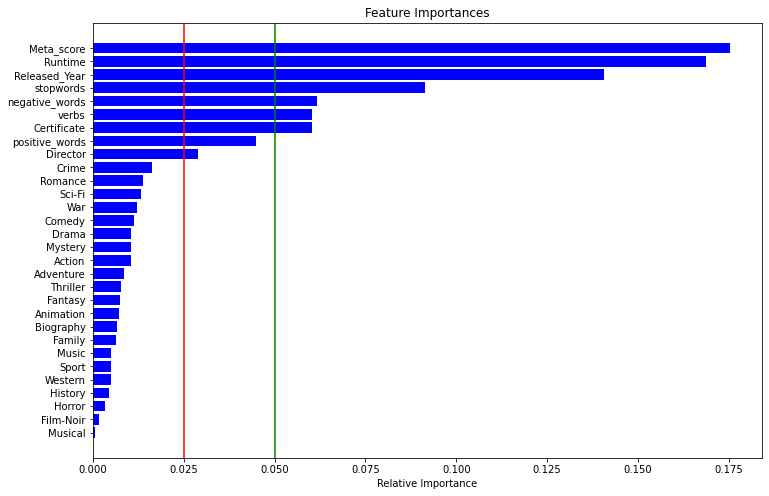

In [91]:
plt.figure(figsize = (12,8))
importances = rf_final.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.axvline(x = 0.025,c = "red")
plt.axvline(x = 0.05,c = "green")
plt.show()

### KNN regressor

In [92]:
from sklearn.neighbors import KNeighborsRegressor

In [93]:
knn = KNeighborsRegressor(n_neighbors=29)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [94]:
mean_squared_error(y_test, knn_pred, squared=False)

0.25862168582183637

In [95]:
r2_score(y_test, knn_pred)

0.16005638902437302

In [97]:
knn_rms = []
for i in tqdm(range(1, 75)):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    knn_rms.append(mean_squared_error(y_test, knn_pred, squared=False))

100%|██████████████████████████████████████████████████████████████████████████████████| 74/74 [00:00<00:00, 98.12it/s]


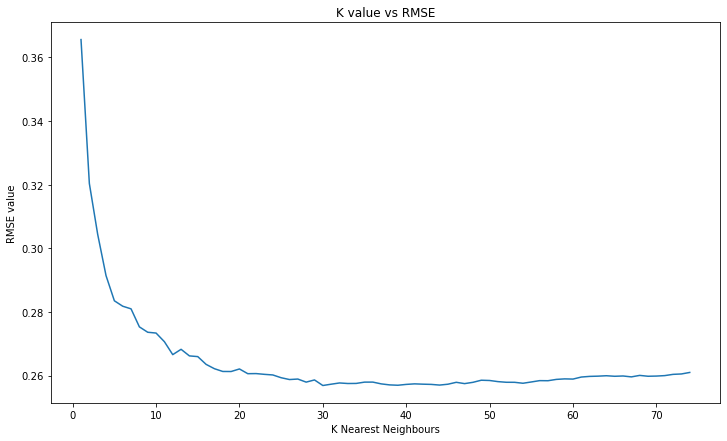

In [98]:
plt.figure(figsize = (12,7))
plt.plot(list(range(1,75)), knn_rms)
plt.title("K value vs RMSE")
plt.xlabel("K Nearest Neighbours")
plt.ylabel("RMSE value")
plt.show()

In [99]:
knn_rms.index(min(knn_rms))

29

In [100]:
min(knn_rms)

0.25687495156348117

#### SVR

In [101]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
svr = make_pipeline(StandardScaler(), SVR(C=0.5, epsilon=0.2))
svr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.5, epsilon=0.2))])

In [102]:
svr_pred = svr.predict(X_test)

In [103]:
mean_squared_error(y_test, svr_pred, squared=False)

0.26628922482294454

In [104]:
r2_score(y_test, svr_pred)

0.10951329220184636

In [105]:
c = list(np.arange(0.1,1,0.1))
ep = list(np.arange(0.1,1.0,0.1))
vals = []
svr_rms = []
for i in tqdm(c):
    for j in ep:
        vals.append(str(round(i,1))+","+str(round(j,1)))
        svr = make_pipeline(StandardScaler(), SVR(C=i, epsilon=j))
        svr.fit(X_train, y_train)
        svr_pred = svr.predict(X_test)
        svr_rms.append(mean_squared_error(y_test, svr_pred, squared=False))

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 10.58it/s]


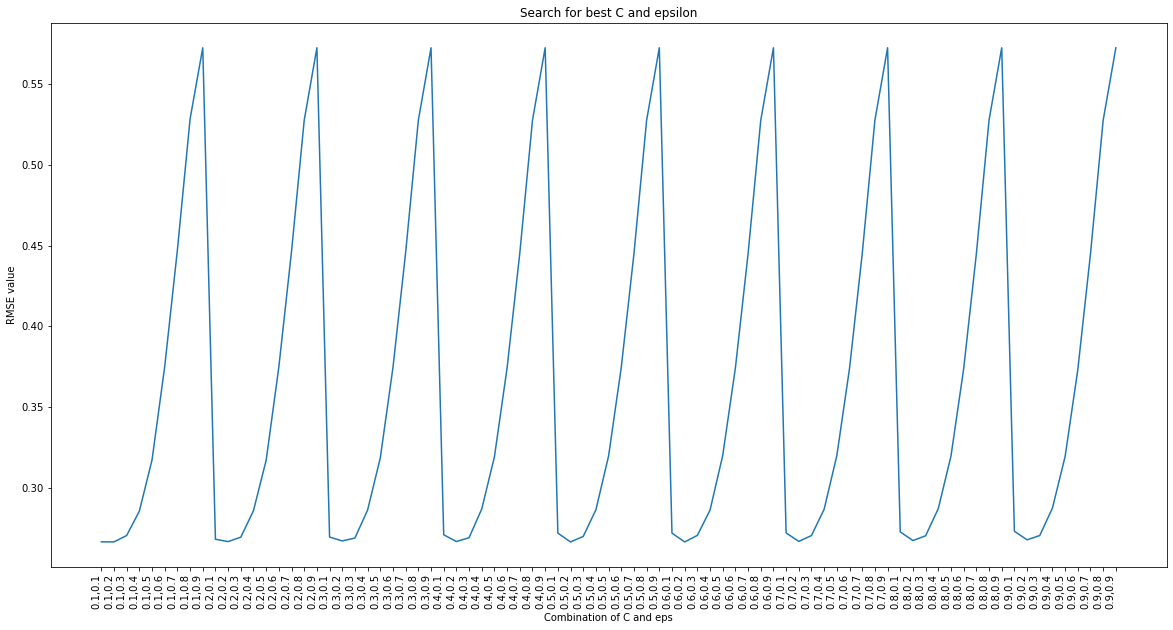

In [106]:
plt.figure(figsize = (20,10))
plt.plot(vals, svr_rms)
plt.xticks(rotation = 90, ha = "right")
plt.title("Search for best C and epsilon")
plt.xlabel("Combination of C and eps")
plt.ylabel("RMSE value")
plt.show()

In [107]:
svr_rms.index(min(svr_rms))

37

In [108]:
vals[37]

'0.5,0.2'

In [109]:
min(svr_rms)

0.26628922482294454

#### K Fold CV with random forest

In [110]:
import random
def k_fold(all_examples, k):

    kfolds = []  
    folds = []

    ind = list(range(len(all_examples)))
    ind1 = ind
    for i in range(k):
        temp = random.sample(ind1, int(len(ind)/k))
        kfolds.append(list(temp))
        ind1=[i for i in ind1 if i not in temp]
   
    for i in kfolds:
        folds.append([all_examples[j] for j in i])
    return folds


In [113]:
folded = k_fold(text_all1, 10)
rms_kfold = []
for i in tqdm(range(10)):
    test = folded[i]
    train = []
    for j in range(10):
        if j!=i:
            for k in folded[j]:               
                train.append(k)
    rf_final = RandomForestRegressor(n_estimators=98, random_state=101)
    rf_final.fit(X_train, y_train)
    pred_rf_final = rf_final.predict(X_test)
    rms_kfold.append(mean_squared_error(y_test, pred_rf_final, squared=False))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  3.10it/s]


In [114]:
rms_kfold

[0.24886624775954194,
 0.24886624775954194,
 0.24886624775954194,
 0.24886624775954194,
 0.24886624775954194,
 0.24886624775954194,
 0.24886624775954194,
 0.24886624775954194,
 0.24886624775954194,
 0.24886624775954194]

### fitting models after removing unwanted features:

In [115]:
x1, x2, y1, y2 = train_test_split(imdb[\
    ['Released_Year', 'Certificate', 'Runtime',\
        'Meta_score', 'Director','positive_words', 'negative_words', 'verbs', 'stopwords']],\
                                                    imdb['IMDB_Rating'], test_size=0.3, random_state=42)

Linear regression:

In [116]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression().fit(X = x1, y = y1)
predlr1 = lr1.predict(x2)
rmselr1 = mean_squared_error(y2, predlr1, squared=False)
r2lr1 = r2_score(y2, predlr1)
print(rmselr1)
print(r2lr1)

0.2524517710585225
0.19965525461993017


Random forest:

In [117]:
rf1 = RandomForestRegressor(n_estimators=98, random_state=101)
rf1.fit(x1, y1)
predrf1 = rf1.predict(x2)
rmserf1 = mean_squared_error(y2, predrf1, squared=False)
r2rf1 = r2_score(y2, predrf1)
print(rmselr1)
print(r2rf1)

0.2524517710585225
0.2448244151011656


KNN Regressor:

In [118]:
knn1 = KNeighborsRegressor(n_neighbors=98)
knn1.fit(x1,y1)
predknn1 = knn1.predict(x2)
rmseknn1 = mean_squared_error(y2, predknn1, squared=False)
r2knn1 = r2_score(y2, predknn1)
print(rmseknn1)
print(r2knn1)

0.2618821175827949
0.13874463098777168


SVR:

In [119]:
svr1 = make_pipeline(StandardScaler(), SVR(C=0.5, epsilon=0.2))
svr1.fit(x1,y1)
predsvr1 = svr1.predict(x2)
rmsesvr1 = mean_squared_error(y2, predsvr1, squared=False)
r2svr1 = r2_score(y2, predsvr1)
print(rmsesvr1)
print(r2svr1)

0.2594825234142373
0.15445547895938683


### XGBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor()

In [ ]:
xgb.fit(X_train, y_train)

In [ ]:
pred_xgb = xgb.predict(X_test)

In [ ]:
mean_squared_error(y_test, pred_xgb, squared=False)

### MLP - SKLearn implementation

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
regr = MLPRegressor(random_state=101,hidden_layer_sizes = (100,10), max_iter=500, activation = "relu").fit(X_train, y_train)
pred_mlp = regr.predict(X_test)
mean_squared_error(y_test, pred_mlp, squared=False)